In [1]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
TRAINING_DIR = r'C:\Users\Gabriel Benga\Documents\Python\TCC\TCC\TCC\Datasets\df1-banco com varias posicoes de mao com diferentes ambientes tbm\train'
TEST_DIR = r'C:\Users\Gabriel Benga\Documents\Python\TCC\TCC\TCC\Datasets\df1-banco com varias posicoes de mao com diferentes ambientes tbm\test'
im_shape = (64, 64)
seed = 10
BATCH_SIZE = 488

In [3]:
#Using keras ImageGenerator and flow_from_directoty

# Subdivision in test/validation
data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)
val_data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [4]:
data_generator = ImageDataGenerator(
        validation_split=0.2,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

val_data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [5]:
# Generator para parte train
train_generator = data_generator.flow_from_directory(TRAINING_DIR, target_size=im_shape, shuffle=True, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="training")
# Generator para parte validação
validation_generator = val_data_generator.flow_from_directory(TRAINING_DIR, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="validation")

# Generator para dataset de teste
test_generator = ImageDataGenerator(rescale=1./255)
test_generator = test_generator.flow_from_directory(TEST_DIR, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE)

nb_train_samples = train_generator.samples
nb_validation_samples = validation_generator.samples
nb_test_samples = test_generator.samples
classes = list(train_generator.class_indices.keys())
print('Classes: '+str(classes))
num_classes  = len(classes)

Found 27774 images belonging to 21 classes.
Found 6940 images belonging to 21 classes.
Found 11548 images belonging to 21 classes.
Classes: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'I', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'Y']


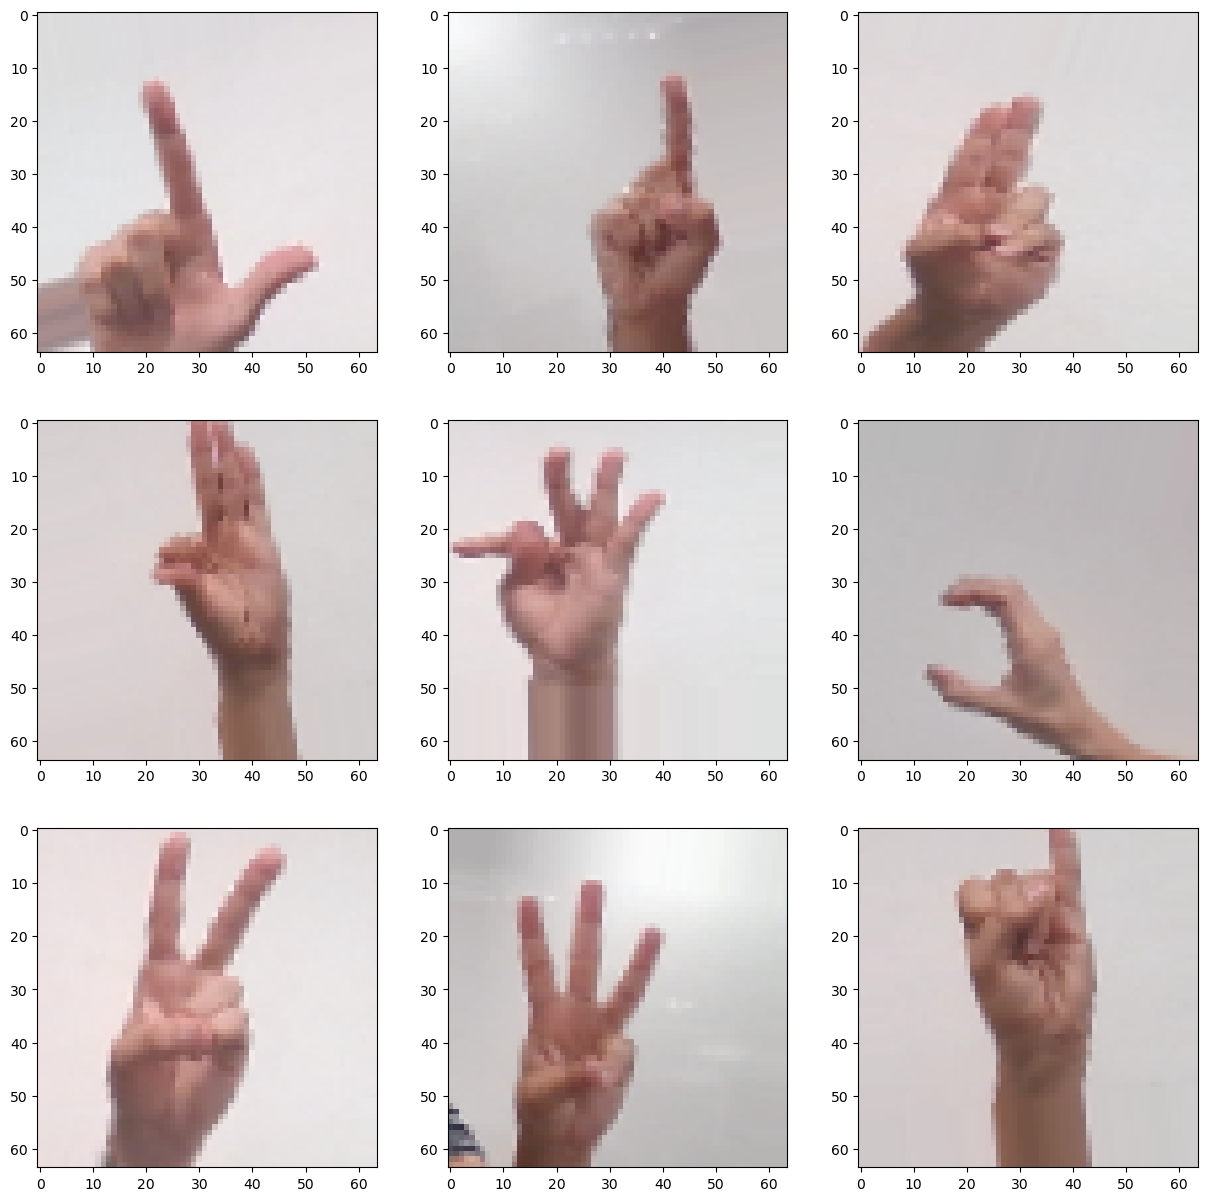

In [6]:
# Visualizing some examples
plt.figure(figsize=(15,15))
for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = next(train_generator)[0] * 255  # Corrigido para usar next() com o iterador
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Input
from keras.optimizers import Adam

In [8]:
model = Sequential()
model.add(Input(shape=(im_shape[0], im_shape[1], 3)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, kernel_size=(3, 3), activation='tanh'))
model.add(Dropout(0.2))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, kernel_size=(3, 3), activation='tanh'))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

# Compila o modelo
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 29, 29, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 10, 10, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         819,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 21)                  │          10,773 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 896,053 (3.42 MB)

 Trainable params: 896,053 (3.42 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
epochs = 18

#Callback to save the best model
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='modelo-treimado.keras',
        monitor='val_loss', save_best_only=True, verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=30,verbose=1)
]

#Training
history = model.fit(
        train_generator,
        steps_per_epoch=nb_train_samples // BATCH_SIZE,
        epochs=epochs,
        callbacks = callbacks_list,
        validation_data=validation_generator,
        verbose = 1,
        validation_steps=nb_validation_samples // BATCH_SIZE)

Epoch 1/18


C:\Users\Gabriel Benga\Documents\Python\Python-sistemas\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 755ms/step - accuracy: 0.0608 - loss: 3.0365
Epoch 1: val_loss improved from inf to 2.59201, saving model to modelo-treimado.keras
56/56 ━━━━━━━━━━━━━━━━━━━━ 54s 838ms/step - accuracy: 0.0611 - loss: 3.0352 - val_accuracy: 0.1653 - val_loss: 2.5920
Epoch 2/18
 1/56 ━━━━━━━━━━━━━━━━━━━━ 17s 316ms/step - accuracy: 0.1639 - loss: 2.6714
Epoch 2: val_loss did not improve from 2.59201
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1639 - loss: 2.6714 - val_accuracy: 0.0000e+00 - val_loss: 3.0114
Epoch 3/18


C:\Users\Gabriel Benga\Documents\Python\Python-sistemas\Anaconda\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 673ms/step - accuracy: 0.1740 - loss: 2.6041
Epoch 3: val_loss improved from 2.59201 to 1.71735, saving model to modelo-treimado.keras
56/56 ━━━━━━━━━━━━━━━━━━━━ 45s 725ms/step - accuracy: 0.1748 - loss: 2.6009 - val_accuracy: 0.4428 - val_loss: 1.7173
Epoch 4/18
 1/56 ━━━━━━━━━━━━━━━━━━━━ 17s 319ms/step - accuracy: 0.3422 - loss: 2.0113
Epoch 4: val_loss did not improve from 1.71735
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3422 - loss: 2.0113 - val_accuracy: 0.4815 - val_loss: 1.8102
Epoch 5/18
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 688ms/step - accuracy: 0.3840 - loss: 1.8398
Epoch 5: val_loss improved from 1.71735 to 0.93914, saving model to modelo-treimado.keras
56/56 ━━━━━━━━━━━━━━━━━━━━ 46s 742ms/step - accuracy: 0.3850 - loss: 1.8368 - val_accuracy: 0.6816 - val_loss: 0.9391
Epoch 6/18
 1/56 ━━━━━━━━━━━━━━━━━━━━ 17s 315ms/step - accuracy: 0.5389 - loss: 1.4460
Epoch 6: val_loss improved from 0.93914 to 0.29911, saving model to modelo-treimado.ker

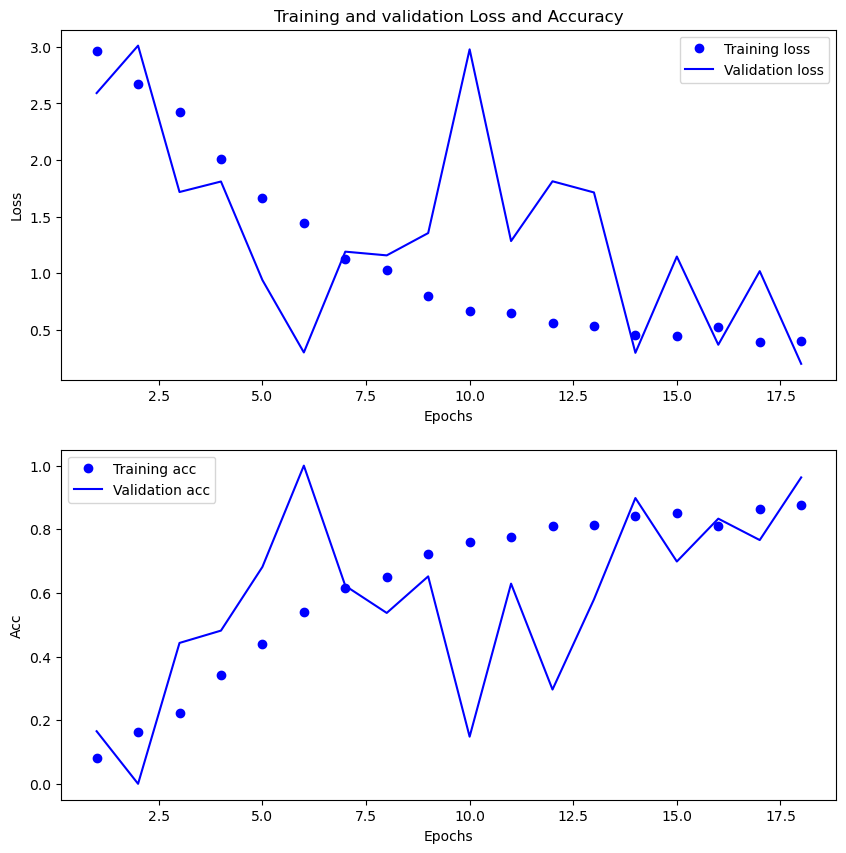

In [10]:
# Training curves
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs_x = range(1, len(loss_values) + 1)
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(epochs_x, loss_values, 'bo', label='Training loss')
plt.plot(epochs_x, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(2,1,2)
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs_x, acc_values, 'bo', label='Training acc')
plt.plot(epochs_x, val_acc_values, 'b', label='Validation acc')
#plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [11]:
from tensorflow.keras.models import load_model

model = load_model('d1-modelo-treimado.keras')

In [12]:
# Using the validation dataset
score = model.evaluate(validation_generator)
print('Val loss:', score[0])
print('Val accuracy:', score[1])


15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 191ms/step - accuracy: 0.7195 - loss: 1.4540
Val loss: 1.3446485996246338
Val accuracy: 0.7240633964538574


In [13]:
# Using the test dataset
score = model.evaluate(test_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 392ms/step - accuracy: 0.7854 - loss: 0.9111
Test loss: 0.8247239589691162
Test accuracy: 0.7823865413665771


In [14]:
import itertools

#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 206ms/step
Classification Report
              precision    recall  f1-score   support

           A       0.51      0.99      0.67       579
           B       0.80      0.52      0.63       562
           C       1.00      0.98      0.99       583
           D       0.87      0.91      0.89       550
           E       0.54      0.98      0.69       574
           F       1.00      0.00      0.01       450
           G       0.98      0.60      0.74       550
           I       0.87      0.48      0.62       550
           L       1.00      0.99      0.99       550
           M       0.76      0.88      0.82       550
           N       0.77      0.62      0.69       550
           O       0.99      0.80      0.89       550
           P       1.00      0.92      0.96       550
           Q       0.99      0.94      0.96       550
           R       0.55      1.00      0.71       550
           S       0.72      0.81      0.76       550
           T      

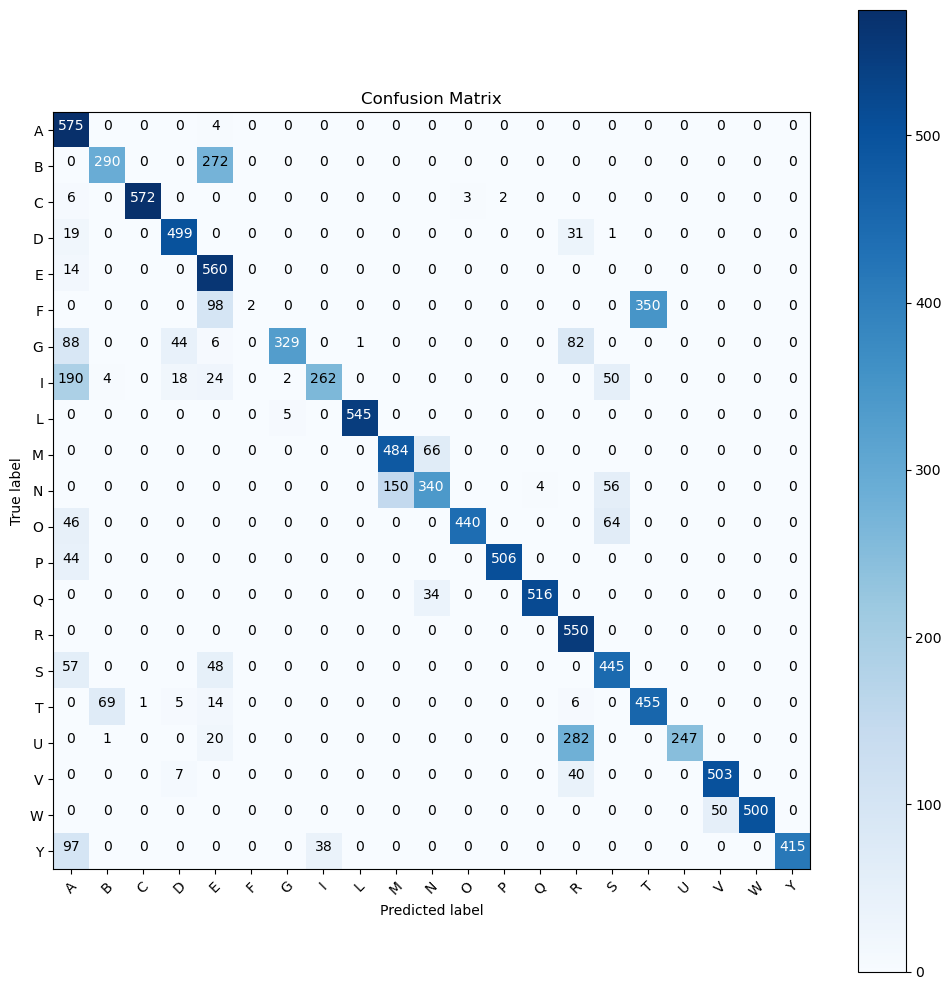

In [15]:
# Some reports
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

#On test dataset
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
target_names = classes

#Confution Matrix
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')

#Classification Report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))